Importing Necessary Library

In [1]:
# Importing Necessary Libraries
import wandb
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.applications import resnet
from tensorflow.keras.applications import VGG16, ResNet50, ResNet101, InceptionResNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

Loading the Dataset

In [2]:
# # Initialize Weights & Biases
# wandb.login(key="e8a360829806e69a22f56a7eb4c7b07aab8c6485")
# wandb.init(project="final-project-ablations", name="tbelekol_run2")

# # Loading the Dataset
# print("[INFO] loading images...")
# imagePaths = list(paths.list_images("/kaggle/input/newdataset/datasetnew"))
# data = []
# labels = []

In [3]:
# for imagePath in imagePaths:
#     # Extract the class label from the filename
#     label = imagePath.split(os.path.sep)[-2]
#     # Load the image, swap color channels, and resize it to 224x224 pixels
#     image = cv2.imread(imagePath)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = cv2.resize(image, (224, 224))
#     # Update the data and labels lists
#     data.append(image)
#     labels.append(label)

# # Convert the data and labels to NumPy arrays while scaling the pixel intensities to the range [0, 1]
# data = np.array(data) / 255.0
# labels = np.array(labels)

Image preprocessing and extract the Label

In [4]:
# lb = LabelBinarizer()
# labels = lb.fit_transform(labels)
# labels = to_categorical(labels)
# # from sklearn.preprocessing import LabelEncoder
# # le = LabelEncoder()
# # labels = le.fit_transform(labels)
# # partition the data into training and testing splits using 80% of
# # the data for training and the remaining 20% for testing
# (trainX, testX, trainY, testY) = train_test_split(data, labels,
# 	test_size=0.20, random_state=42,stratify=labels)

# # Initialize the training data augmentation object
# trainAug = ImageDataGenerator(
#     rotation_range=45, 
#     width_shift_range=0.02, 
#     height_shift_range=0.02, 
#     zoom_range=0.02, 
#     horizontal_flip=True, 
#     fill_mode="nearest"
# )

In [5]:
# # Initialize Weights & Biases
# wandb.login(key="e8a360829806e69a22f56a7eb4c7b07aab8c6485")
# wandb.init(project="final-project-ablations", name="tbelekol_run2")

# # Loading the Dataset
# print("[INFO] loading images...")
# imagePaths = list(paths.list_images("/kaggle/input/newdataset/datasetnew"))
# data = []
# labels = []

# # Loop over the image paths
# for imagePath in imagePaths:
#     # Extract the class label from the directory name (monkey_image or chicken_pox)
#     label = imagePath.split(os.path.sep)[-2]
    
#     # Load the image and preprocess it
#     image = cv2.imread(imagePath)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = cv2.resize(image, (224, 224))
    
#     # Update the data and labels lists
#     data.append(image)
#     labels.append(label)

# # Convert the data and labels to NumPy arrays and scale pixel values to [0, 1]
# data = np.array(data) / 255.0
# labels = np.array(labels)

# # Encode the labels as binary vectors
# lb = LabelBinarizer()
# labels = lb.fit_transform(labels)
# labels = to_categorical(labels)

# # Split the data into training and testing sets
# (trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, random_state=42, stratify=labels)

# # Initialize data augmentation
# trainAug = ImageDataGenerator(
#     rotation_range=15,
#     fill_mode="nearest"
# )

# print("[INFO] Data loading complete.")


# Initialize Weights & Biases
wandb.login(key="e8a360829806e69a22f56a7eb4c7b07aab8c6485")
wandb.init(project="final-project-ablations", name="tbelekol_run2")

# Loading the Dataset
print("[INFO] loading images...")
imagePaths = list(paths.list_images("/kaggle/input/converted-dataset/converted_data"))
data = []
labels = []

# Loop over the image paths
for imagePath in imagePaths:
    # Extract the class label from the directory name (monkey_image or chicken_pox)
    label = imagePath.split(os.path.sep)[-2]
    
    # Load the image and preprocess it
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    
    # Update the data and labels lists
    data.append(image)
    labels.append(label)

# Convert the data and labels to NumPy arrays and scale pixel values to [0, 1]
data = np.array(data) / 255.0
labels = np.array(labels)

# Encode the labels as binary vectors
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# Ensure the labels have the correct shape (None, 2) for binary classification
if labels.shape[1] == 1:
    labels = np.hstack((labels, 1 - labels))  # Convert to shape (None, 2)

print(f"[INFO] Encoded labels shape: {labels.shape}")

# Split the data into training and testing sets
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, random_state=42, stratify=labels)

# Initialize data augmentation
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest"
)

print("[INFO] Data loading complete.")


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: amuhairw (delta-group-50). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.19.1
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250316_132956-6fby0ap1
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run tbelekol_run2
wandb: ⭐️ View project at https://wandb.ai/delta-group-50/final-project-ablations
wandb: 🚀 View run at https://wandb.ai/delta-group-50/final-project-ablations/runs/6fby0ap1


[INFO] loading images...
[INFO] Encoded labels shape: (90, 2)
[INFO] Data loading complete.


In [6]:
baseModel =VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
#baseModel =ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
# baseModel =ResNet101(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
#baseModel =InceptionResNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
	layer.trainable = False
	# compile our model

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# model.summary()

In [8]:
INIT_LR = 1e-3
EPOCHS = 100
BS = 30

In [9]:
import tensorflow as tf
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# #opt = tf.keras.optimizers.SGD(learning_rate=INIT_LR)
# opt = tf.keras.optimizers.RMSprop(learning_rate=INIT_LR)



# opt = Adam(learning_rate=INIT_LR) 

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [10]:
# compile our model
print("[INFO] compiling model...")
#opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
#model.compile(loss="hinge", optimizer=opt,
	#metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
wandb_callback = wandb.keras.WandbMetricsLogger(log_freq="epoch")
import time
t1=time.process_time()
H = model.fit(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,
     callbacks=[wandb_callback]
)
t2 =time.process_time()
print("process time:", t2-t1)  
#model.save("vgg16.h5")

[INFO] compiling model...
[INFO] training head...
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 9s/step - accuracy: 0.5556 - loss: 0.7186 - val_accuracy: 0.5000 - val_loss: 0.6756
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.3333 - loss: 0.7202 - val_accuracy: 0.6667 - val_loss: 0.6628
Epoch 3/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.4571 - loss: 0.7208 - val_accuracy: 0.6667 - val_loss: 0.6533
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7000 - loss: 0.6017 - val_accuracy: 0.6111 - val_loss: 0.6553
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.6127 - loss: 0.7037 - val_accuracy: 0.5000 - val_loss: 0.6593
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5333 - loss: 0.8023 - val_accuracy: 0.5000 - val_loss: 0.6598
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 0.6000 - loss: 0.6473 - val_accuracy: 0.6667 - val_loss: 0.6646
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.4167 - loss: 0.7833 - val_accuracy: 0.6111 - val_loss: 0.6685
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.6310 - loss: 0.6796 - val_accuracy: 0.6667 - val_loss: 0.6759
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.6667 - loss: 0.6510 - val_accuracy: 0.7222 - val_loss: 0.

In [11]:
print(len(H.history['loss']))

100


In [12]:
model.save_weights("my_model_weights.weights.h5")

In [13]:
# Log model weights to W&B as an artifact
artifact = wandb.Artifact("monkeypox-model", type="model")
artifact.add_file("my_model_weights.weights.h5")
wandb.log_artifact(artifact)

#classification report on training
predIdxs = model.predict(trainX)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
trainpredict = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), trainpredict,
	target_names=lb.classes_))

3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step
                      precision    recall  f1-score   support

Chickenpox_grayscale       0.88      0.82      0.85        34
      Monkeypox_gray       0.85      0.89      0.87        38

            accuracy                           0.86        72
           macro avg       0.86      0.86      0.86        72
        weighted avg       0.86      0.86      0.86        72



In [14]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(trainY.argmax(axis=1), trainpredict)
total = sum(sum(cm))
print(cm)
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

# Log metrics to W&B
wandb.log({
    "train_accuracy": acc,
    "train_sensitivity": sensitivity,
    "train_specificity": specificity
})

[[28  6]
 [ 4 34]]
acc: 0.8611
sensitivity: 0.8235
specificity: 0.8947


In [15]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdys = model.predict(testX, batch_size=BS)
testpredict = np.argmax(predIdys, axis=1)
print(classification_report(testY.argmax(axis=1), testpredict,
	target_names=lb.classes_))

[INFO] evaluating network...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
                      precision    recall  f1-score   support

Chickenpox_grayscale       0.45      0.56      0.50         9
      Monkeypox_gray       0.43      0.33      0.38         9

            accuracy                           0.44        18
           macro avg       0.44      0.44      0.44        18
        weighted avg       0.44      0.44      0.44        18



In [16]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), testpredict)
total = sum(sum(cm))
print(cm)
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

# Log test metrics to W&B
wandb.log({
    "test_accuracy": acc,
    "test_sensitivity": sensitivity,
    "test_specificity": specificity
})

[[5 4]
 [6 3]]
acc: 0.4444
sensitivity: 0.5556
specificity: 0.3333


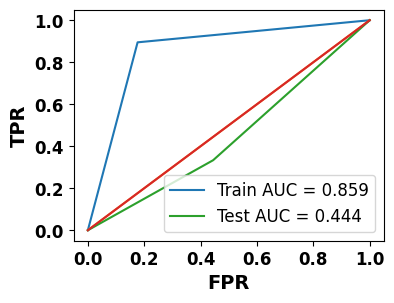

<Figure size 640x480 with 0 Axes>

In [17]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
fig = plt.figure(figsize = (4, 3))
fpr1,tpr1,_=roc_curve(np.argmax(trainY, axis=1),np.argmax(predIdxs, axis=1))
fpr2,tpr2,_=roc_curve(np.argmax(testY, axis=1),np.argmax(predIdys, axis=1))
area_under_curve1=auc(fpr1,tpr1)
random_probs=[0 for i in range(len(trainY.ravel()))]
p_fpr1,p_tpr1,threshold=roc_curve(trainY.ravel(),random_probs, pos_label=1)
plt.plot(fpr1,tpr1, label='Train AUC = {:.3f}'.format(area_under_curve1))
plt.plot(p_fpr1, p_tpr1)
area_under_curve2=auc(fpr2,tpr2)
random_probs2=[0 for i in range(len(testY.ravel()))]
p_fpr2,p_tpr2,threshold=roc_curve(testY.ravel(),random_probs2, pos_label=1)
plt.plot(fpr2,tpr2, label='Test AUC = {:.3f}'.format(area_under_curve2))
plt.plot(p_fpr2, p_tpr2)

    # x label
plt.xlabel('FPR',fontsize=14, fontdict=dict(weight='bold'))
    # y label
plt.ylabel('TPR', fontsize=14, fontdict=dict(weight='bold'))
plt.xticks( rotation=0, weight = 'bold', )
plt.yticks( rotation=0, weight = 'bold')
plt.tick_params(rotation=0,axis='y', labelsize=12)
plt.tick_params(rotation=0,axis='x', labelsize=12)
plt.legend()
plt.legend(prop={'size':12})
plt.savefig('ROC',dpi=200, bbox_inches='tight')
plt.show();

# Log ROC curve to W&B
wandb.log({"ROC_curve": wandb.Image(plt)})

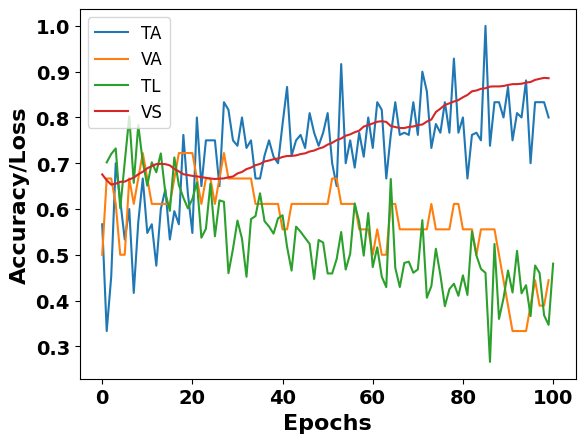

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:      epoch/accuracy ▁▂▁▃▁▁▂▅▄▅▅▃▃▃▆▄▄▅▄▅▃▇▃▃▄▄▄▆▆▅▄▅▄█▅▅▅▃▅▅
wandb:         epoch/epoch ▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▅▆▆▆▆▇▇▇████
wandb: epoch/learning_rate ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:          epoch/loss ▇▇█▇▆▇▆▇▆▅▅▄▅▆▅▅▄▄▄▄▄▄▄▃▄▅▃▃▃▃▃▄▃▅▁▄▄▃▃▄
wandb:  epoch/val_accuracy ▄▄▄▆▆▆▆▆██▇█▇▇▇▆▆▆▆▅▆▆▇▆▅▄▆▅▅▅▅▆▅▅▅▄▁▁▃▂
wandb:      epoch/val_loss ▁▁▂▂▂▂▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▅▅▅▅▅▆▆▆▇▇▇▇▇▇████
wandb:       test_accuracy ▁
wandb:    test_sensitivity ▁
wandb:    test_specificity ▁
wandb:      train_accuracy ▁
wandb:   train_sensitivity ▁
wandb:   train_specificity ▁
wandb: 
wandb: Run summary:
wandb:      epoch/accuracy 0.8
wandb:         epoch/epoch 99
wandb: epoch/learning_rate 0.001
wandb:          epoch/loss 0.4807
wandb:  epoch/val_accuracy 0.44444
wandb:      epoch/val_loss 0.88581
wandb:       test_accuracy 0.44444
wandb:    test_sensitivity 0.55556
wandb: 

<Figure size 640x480 with 0 Axes>

In [18]:

from matplotlib.ticker import FormatStrFormatter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

N=len(H.history['loss'])
fig, ax = plt.subplots()
#plt.rcParams["font.family"] = "serif"
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
#font={'size':10}
#matplotlib.rc('font',**font)
loss = H.history['loss']
val_loss = H.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(np.arange(0, N), H.history["accuracy"], label="TA")
#plt.plot(epochs, loss, label='Training loss')
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="VA")
plt.plot(epochs, loss, label='TL')
#plt.plot(np.arange(0, N), H.history["val_accuracy"], label="validation accuracy")
plt.plot(np.arange(0, N), val_loss, label='VS')
#plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(1, val_acc, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs',fontsize=16, fontdict=dict(weight='bold'))
    # y label
plt.ylabel('Accuracy/Loss', fontsize=16, fontdict=dict(weight='bold'))
#plt.ylabel("Accuracy")
#plt.xlabel("Epochs")
plt.xticks( rotation=0, weight = 'bold' )
plt.yticks( rotation=0, weight = 'bold')
plt.tick_params(rotation=0,axis='y', labelsize=14)
plt.tick_params(rotation=0,axis='x', labelsize=14)
#plt.grid('white')
#plt.grid(axis='x', color='0.95')
plt.legend(loc='best')
plt.legend(prop={'size':12})
#fig = plt.figure(figsize = (4, 3))
plt.savefig('ACC',dpi=200, bbox_inches='tight')
plt.show()

# Log accuracy/loss plot to W&B
wandb.log({"Accuracy_Loss_Plot": wandb.Image(plt)})

# Finish W&B run
wandb.finish()